# Stramski, Bricaud & Morel 2001

In [30]:
import os
from pkg_resources import resource_filename
from importlib import reload

import numpy as np 
import pandas

import seaborn as sns
from matplotlib import pyplot as plt

from oceancolor.ph import load_data
from oceancolor.utils import plotting

# Load em

In [18]:
reload(load_data)
tables = load_data.stramski2001()

# Examine

In [10]:
tables['abs'].head()

,Lambda,VIRU,HBAC,PROC,SYNE,SYMA,PING,PSEU,LUTH,GALB,HUXL,CRUE,FRAG,PARV,BIOC,TERT,CURV,ELON,MICA
0,350,0,0.004826,0.037930,0.079633,0.212869,2.550750,4.983418,5.208461,5.580558,5.969086,4.923939,7.771711,6.524409,19.26489,24.47951,14.48534,71.25391,359.8525
1,351,0,0.004781,0.037848,0.079387,0.212420,2.545568,4.979363,5.198962,5.570299,5.957730,4.914075,7.756995,6.511148,19.23499,24.44177,14.45770,71.15968,359.3751
2,352,0,0.004716,0.037581,0.078751,0.210956,2.528614,4.968409,5.167789,5.536621,5.920554,4.881778,7.708757,6.467753,19.13690,24.31774,14.36706,70.84864,357.7193
3,353,0,0.004660,0.037362,0.078200,0.209747,2.514597,4.962196,5.142019,5.508796,5.889819,4.855131,7.668898,6.431915,19.05557,24.21505,14.29216,70.59052,356.3410
4,354,0,0.004586,0.037187,0.077697,0.208789,2.503483,4.959815,5.121536,5.486681,5.865424,4.833933,7.637241,6.403488,18.99084,24.13345,14.23271,70.38515,355.2349


In [19]:
tables['att'].head()

,Lambda,VIRU,HBAC,PROC,SYNE,SYMA,PING,PSEU,LUTH,GALB,HUXL,CRUE,FRAG,PARV,BIOC,TERT,CURV,ELON,MICA
0,350,0.000009,0.115507,0.117722,0.775580,2.318659,23.998230,30.265458,46.346221,37.047508,44.921376,37.589269,62.953931,47.094259,79.48586,98.46397,108.04081,216.93781,1168.8772
1,351,0.000009,0.115314,0.117199,0.772219,2.309113,24.013448,30.284003,46.383322,37.162709,45.063160,37.719575,63.085865,47.163198,79.62561,98.40334,108.07885,217.00328,1169.0244
2,352,0.000009,0.114833,0.116512,0.767847,2.299328,24.026044,30.323289,46.432709,37.277341,45.202694,37.841598,63.220847,47.217873,79.77049,98.34077,108.11785,217.04974,1168.9823
3,353,0.000009,0.114317,0.115870,0.763561,2.289659,24.038507,30.360376,46.477589,37.391316,45.342149,37.966071,63.352888,47.276645,79.91235,98.27395,108.15305,217.08872,1168.9819
4,354,0.000009,0.113688,0.115273,0.759286,2.280109,24.050873,30.397225,46.518016,37.504441,45.481444,38.092883,63.481961,47.339418,80.05105,98.20313,108.18437,217.12005,1169.0116


# Plots

## Absorption 

In [11]:
lmbda = tables['abs'].Lambda.values

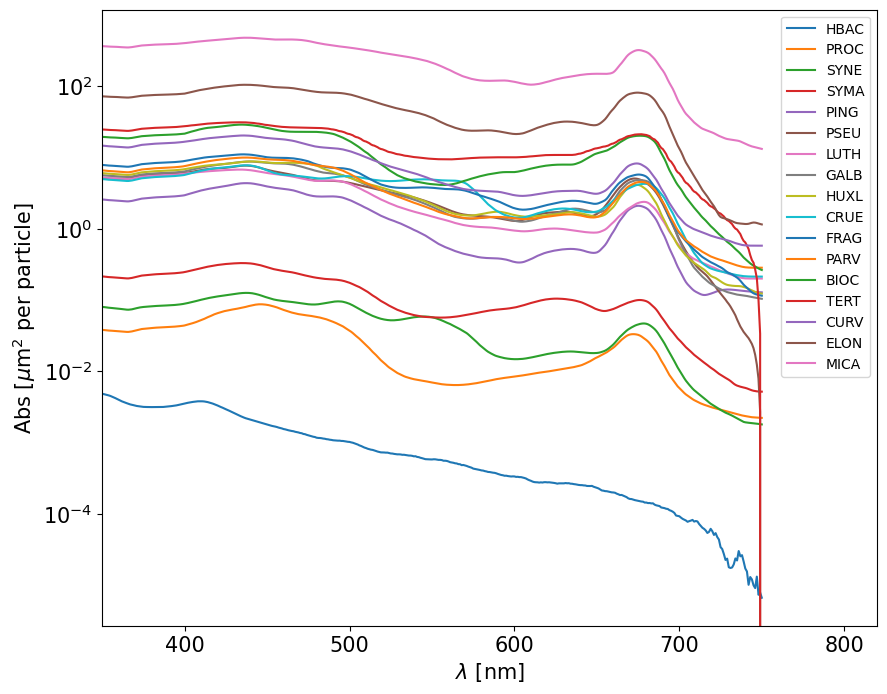

In [33]:
plt.figure(figsize=(10,8))
plt.clf()
ax = plt.gca()

for key in tables['abs'].keys():
    if key in ['Lambda', 'VIRU']:
        continue
    ax.plot(lmbda, tables['abs'][key], label=key)

# Median
ax.set_xlabel(r'$\lambda$ [nm]')
ax.set_ylabel(r'Abs [$\mu {\rm m}^2$ per particle]')
ax.set_xlim(350, 820.)
ax.set_yscale('log')
ax.legend()
plotting.set_fontsize(ax, 15)
plt.show()

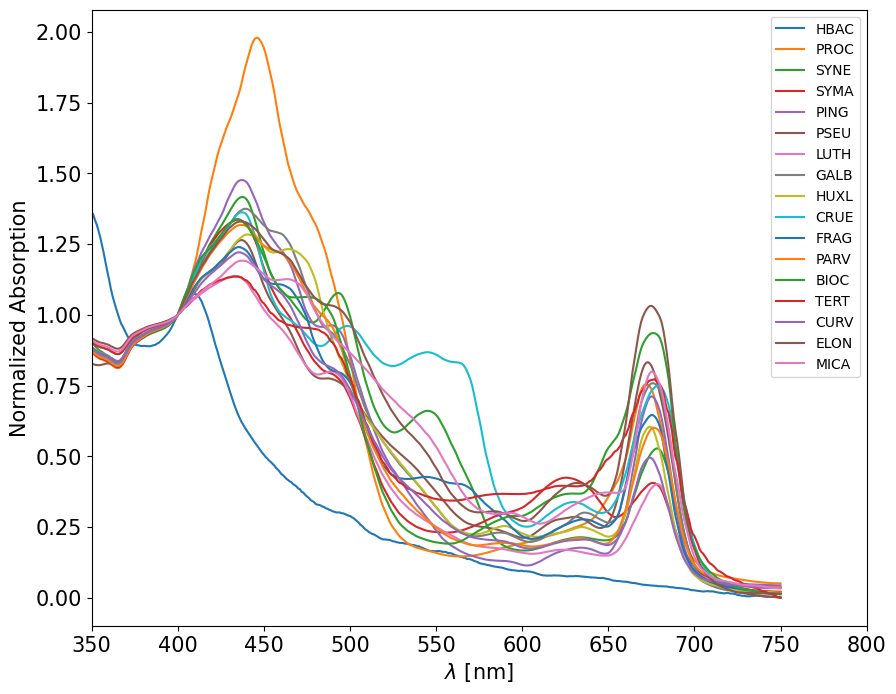

In [34]:
i400 = np.argmin(np.abs(lmbda-400.))
plt.figure(figsize=(10,8))
plt.clf()
ax = plt.gca()

for key in tables['abs'].keys():
    if key in ['Lambda', 'VIRU']:
        continue
    ax.plot(lmbda, tables['abs'][key]/tables['abs'][key].values[i400], label=key)

# Median
ax.set_xlabel(r'$\lambda$ [nm]')
ax.set_ylabel(r'Normalized Absorption')
ax.set_xlim(350, 800.)
#ax.set_yscale('log')
plotting.set_fontsize(ax, 15)

ax.legend()
plt.show()

## Attenuation

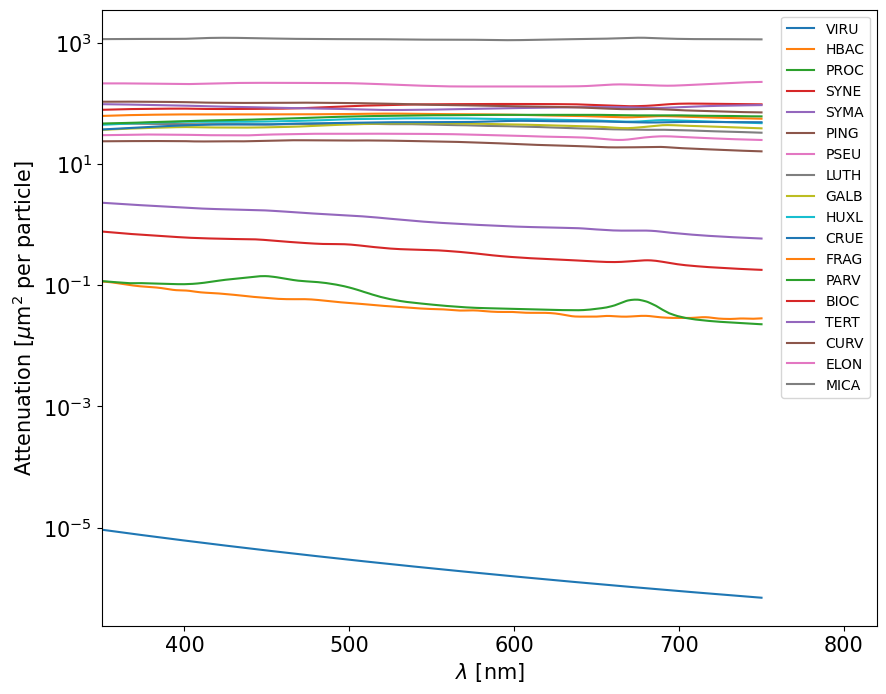

In [37]:
plt.figure(figsize=(10,8))
plt.clf()
ax = plt.gca()

for key in tables['att'].keys():
    if key in ['Lambda']:
        continue
    ax.plot(tables['att']['Lambda'].values, tables['att'][key], label=key)

# Median
ax.set_xlabel(r'$\lambda$ [nm]')
ax.set_ylabel(r'Attenuation [$\mu {\rm m}^2$ per particle]')
ax.set_xlim(350, 820.)
ax.set_yscale('log')
ax.legend()
plotting.set_fontsize(ax, 15)

plt.show()